<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/cars_and_people_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#shift+command+space

In [2]:
!ls /content/people_cars


test  train


In [3]:
import os
for dirpath, dirnames, filenames in os.walk('/content/people_cars'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in /content/people_cars
there are 2 directories and 1 images in /content/people_cars/train
there are 0 directories and 10 images in /content/people_cars/train/people
there are 0 directories and 10 images in /content/people_cars/train/cars
there are 2 directories and 1 images in /content/people_cars/test
there are 0 directories and 3 images in /content/people_cars/test/people
there are 0 directories and 3 images in /content/people_cars/test/cars


In [4]:
num_cars_images_train = len(os.listdir('/content/people_cars/train/cars'))
num_cars_images_train

10

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/people_cars/train')
data_dir

PosixPath('/content/people_cars/train')

In [6]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['.DS_Store' 'cars' 'people']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #pizza_steak /test/pizza
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (168, 300, 3)


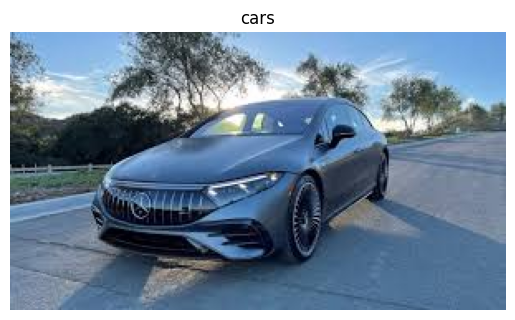

In [8]:
img = view_random_image(target_dir= '/content/people_cars/train/',
                        target_class= 'cars')

array([[[130, 173, 215],
        [ 73, 118, 159],
        [112, 156, 201],
        ...,
        [104, 157, 223],
        [104, 157, 225],
        [104, 157, 225]],

       [[128, 170, 210],
        [ 81, 123, 163],
        [ 93, 136, 178],
        ...,
        [104, 157, 223],
        [104, 157, 225],
        [104, 157, 225]],

       [[136, 172, 208],
        [ 92, 130, 167],
        [121, 160, 199],
        ...,
        [105, 158, 224],
        [105, 158, 224],
        [105, 158, 224]],

       ...,

       [[114, 135, 156],
        [119, 140, 161],
        [118, 136, 158],
        ...,
        [ 79, 113, 148],
        [ 79, 113, 148],
        [ 79, 113, 148]],

       [[119, 140, 161],
        [123, 144, 165],
        [121, 139, 161],
        ...,
        [ 79, 113, 148],
        [ 79, 113, 148],
        [ 79, 113, 148]],

       [[108, 129, 150],
        [114, 135, 156],
        [116, 134, 156],
        ...,
        [ 81, 115, 150],
        [ 81, 115, 150],
        [ 81, 115, 150]]], dtype=uint8)
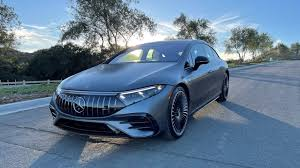

In [9]:
img

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/people_cars/train'
test_dir = '/content/people_cars/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=2,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=2,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 3s 149ms/step - loss: 0.8033 - accuracy: 0.4500 - val_loss: 0.6807 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 1s 110ms/step - loss: 0.6477 - accuracy: 0.7000 - val_loss: 0.6540 - val_accuracy: 0.8333
Epoch 3/5
10/10 [==============================] - 1s 148ms/step - loss: 0.5260 - accuracy: 1.0000 - val_loss: 0.5138 - val_accuracy: 0.6667
Epoch 4/5
10/10 [==============================] - 2s 195ms/step - loss: 0.2131 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 0.8333
Epoch 5/5
10/10 [==============================] - 1s 139ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.1287 - val_accuracy: 1.0000


Image shape: (194, 260, 3)
Image shape: (165, 305, 3)


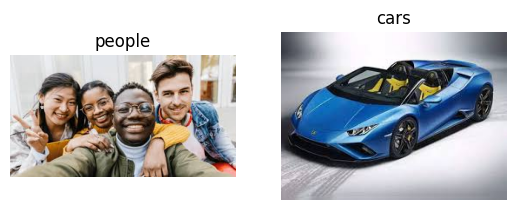

In [11]:
plt.figure()
plt.subplot(1,2,2)
view_random_image('people_cars/train/', 'cars')
plt.subplot(1,2,1)
view_random_image('people_cars/train/', 'people')
plt.show()

In [12]:
train_dir = '/content/people_cars/train/'
test_dir = '/content/people_cars/test/'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode='binary',
                                        seed=42)

Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [14]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 149ms/step - loss: 0.1287 - accuracy: 1.0000


[0.12871256470680237, 1.0]

In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.grid()
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.grid(axis='y')
  plt.legend()

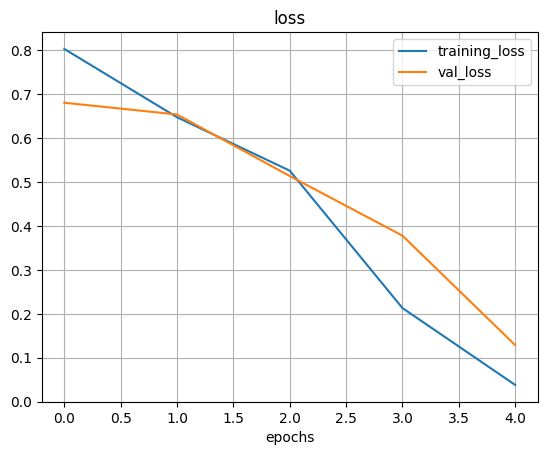

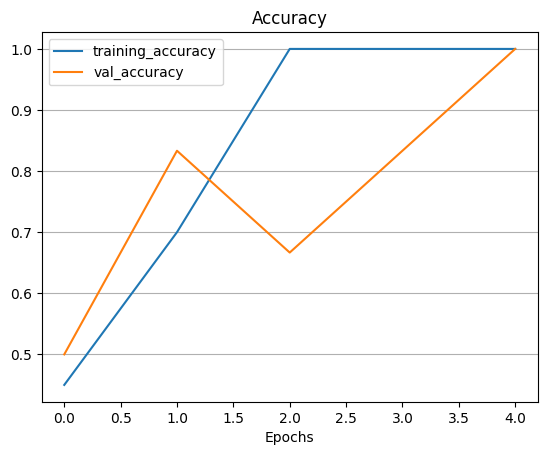

In [16]:
plot_loss_curves(history_1)

In [18]:
import matplotlib.image as mpimg
car = mpimg.imread("/content/merc car.jpeg")

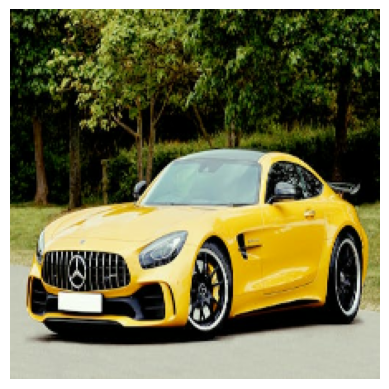

In [28]:
import matplotlib.pyplot as plt
plt.imshow(car)
plt.axis(False)
plt.show()

In [20]:
car.shape

(333, 500, 3)

In [21]:
car_norm = ImageDataGenerator(rescale=1/255.)
car_norm

In [22]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img =tf.image.resize(img, size= [img_shape, img_shape])
  img = img/255.
  return img

(load_and_prep_image("/content/merc car.jpeg").shape)

TensorShape([224, 224, 3])

In [23]:
car = load_and_prep_image('/content/merc car.jpeg')
pred = model_1.predict(tf.expand_dims(car, axis=0))

1/1 [==============================] - 0s 157ms/step


In [24]:
pred

array([[0.03154911]], dtype=float32)

In [25]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'.DS_Store'

1/1 [==============================] - 0s 37ms/step


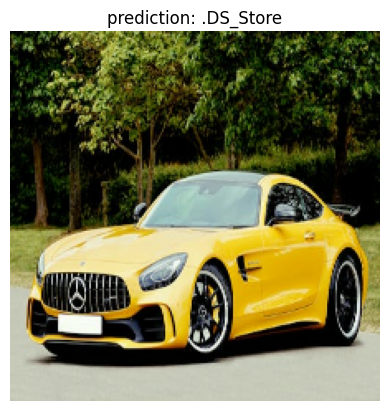

In [27]:
def pred_and_plotn(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

pred_and_plotn(model_1, "/content/merc car.jpeg")

In [29]:
efficientrel_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"

In [57]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

IMAGE_SHAPE = (224,224)

def create_model(model_url, num_classes=1):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable= False,
                                           name = 'Feature_ectraction_layer')

  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = 'sigmoid', name = "output_layer")
  ])

  return model

In [58]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data.num_classes)

In [60]:
resnet_model.build(input_shape=(1, 224, 224, 3))

In [61]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_ectraction_layer (  (1, 2048)                 23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (1, 2)                    4098      
                                                                 
Total params: 23568898 (89.91 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [62]:
resnet_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [65]:
# Change the target labels to one-hot encoded format with depth=1
train_labels_onehot = tf.one_hot(train_data.labels, depth=1)
valid_labels_onehot = tf.one_hot(valid_data.labels, depth=1)



In [68]:
import tensorflow as tf
from tensorflow.keras import layers, models
def build_resnet(input_shape):
    input_layer = layers.Input(shape=input_shape)
    base_model = tf.keras.applications.ResNet50(input_tensor=input_layer,
                                                 include_top=False,
                                                 weights='imagenet')

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)  # Binary classification, so 1 unit with sigmoid activation

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model
model = build_resnet(input_shape=(224,224,3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [69]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=8,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Epoch 1/8
1/1 [==============================] - 13s 13s/step - loss: 0.7387 - accuracy: 0.5000 - val_loss: 0.9059 - val_accuracy: 0.5000
Epoch 2/8
1/1 [==============================] - 4s 4s/step - loss: 0.8845 - accuracy: 0.5000 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 3/8
1/1 [==============================] - 5s 5s/step - loss: 0.6594 - accuracy: 0.5500 - val_loss: 0.6454 - val_accuracy: 0.5000
Epoch 4/8
1/1 [==============================] - 8s 8s/step - loss: 0.6525 - accuracy: 0.5000 - val_loss: 0.6667 - val_accuracy: 0.5000
Epoch 5/8
1/1 [==============================] - 4s 4s/step - loss: 0.6821 - accuracy: 0.5000 - val_loss: 0.6006 - val_accuracy: 0.6667
Epoch 6/8
1/1 [==============================] - 4s 4s/step - loss: 0.6003 - accuracy: 0.5000 - val_loss: 0.5562 - val_accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - 6s 6s/step - loss: 0.5254 - accuracy: 0.9500 - val_loss: 0.5886 - val_accuracy: 0.5000
Epoch 8/8
1/1 [==============================]

In [70]:
car = load_and_prep_image('/content/merc car.jpeg')
pred = model.predict(tf.expand_dims(car, axis=0))

1/1 [==============================] - 2s 2s/step


In [71]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'cars'

1/1 [==============================] - 0s 415ms/step


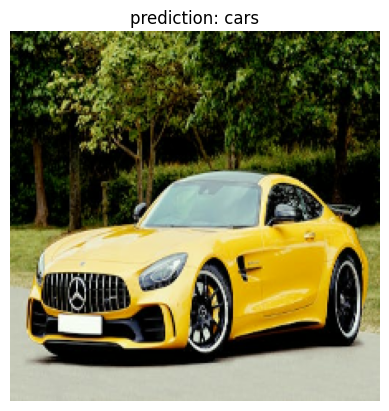

In [73]:
def pred_and_plotn(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

pred_and_plotn(model, "/content/merc car.jpeg")